<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 17 Numerical Computation

## Root finding

In [1]:
f(x) = exp(x) - x^4;

Roots:

In [14]:
α₀, α₁, α₂ = -0.8155534188089607, 1.4296118247255556, 8.6131694564414;
f(α₂)

1.8189894035458565e-12

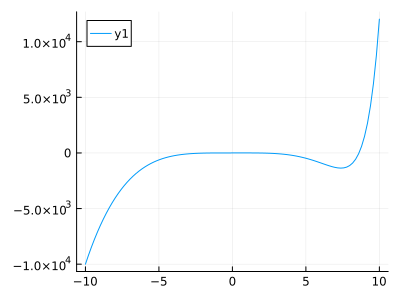

In [6]:
using Plots

xv = range(-10, 10., length=100)
yv = f.(xv)
plot(xv, yv, size=(400,300))

In [15]:
using Roots

find_zero(f, (5, 10.))

8.6131694564414

There a various choices for the used method:

In [16]:
find_zero(f, (5, 10.), Roots.Brent())

8.6131694564414

## Numerical integration

Here we use [QuadGK.jl](https://juliamath.github.io/QuadGK.jl). This package implements one-dimensional numerical integration ("quadrature") in Julia using adaptive Gauss–Kronrod quadrature.

In [18]:
using QuadGK

integral, error = quadgk(x -> 1/x^2, 1., 4.)

(0.7500000000000002, 1.1119187431907207e-8)

One can also determine improper integrals:

In [19]:
integral, error = quadgk(x -> exp(-x^2), 0., Inf)

(0.8862269254527579, 8.595134596701424e-9)

## Interpolation

In [29]:
using Interpolations, Plots

# Lower and higher bound of interval
a = 1.0
b = 10.0

# Interval definition
x = a:1.0:b
# This can be any sort of array data, as long as
# length(x) == length(y)

y = @. cos(x^2 / 9.0) # Function application by broadcasting

# Interpolations
itp_linear = linear_interpolation(x, y)
itp_cubic = cubic_spline_interpolation(x, y);

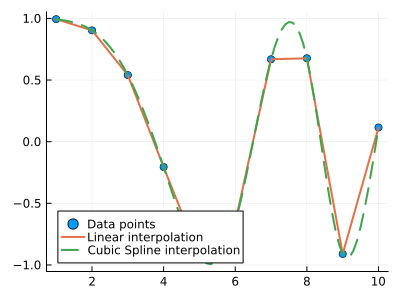

In [27]:
# Interpolation functions
f_linear(x) = itp_linear(x)
f_cubic(x) = itp_cubic(x)

# Plots
x_new = a:0.1:b # smoother interval, necessary for cubic spline

scatter(x, y, markersize=4,label="Data points", size=(400,300))
plot!(f_linear, x_new, w=2,label="Linear interpolation")
plot!(f_cubic, x_new, linestyle=:dash, w=2, label="Cubic Spline interpolation")
plot!(legend = :bottomleft)